# LogisticRegression-Prognosis

Using machine learning models to do prognosis.

### Dataset:  
age  

sex (1: male, 0: female) 

cp: type of chest pain (1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic)  

trestbps: resting blood pressure 
chol: serum cholesterol  

fbs: fasting blood sugar (>120mg/dl 1: True, 0: False) 

restecg: resting electrocardiographic results (0: normal, 1: with ST-T wave abnormalities, 2: probable or definite left ventricular hypertrophy according to Estes criteria)  

thalach: maximum heart rate achieved 

exang: exercise induced angina (1: yes, 0: no) 

oldpeak: oldpeak = ST 

slope: the slope of the peak exercise ST segment (1: up, 2: flat, 3: down)

ca: number of major cessels flourosopy 

thal: defect (3: normal, 6: fixed, 7: reversible)

target: (0: no heart disease, 1: yes heart disease)

## Import packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
dataPath = 'heart.csv'
data = pd.read_csv(dataPath)

## Explore dataset

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# main information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Use the .describe() function to see the statistics of the data
# Statistics including total number, mean, variance, minimum, first quartile, second quartile, third quartile, maximum
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


([<matplotlib.patches.Wedge at 0x7fab8dd9b520>,
 [Text(-0.1604426989002982, 1.1387528881937419, 'Sick'),
  Text(0.16044280551803777, -1.1387528731720071, 'Not sick')],
 [Text(-0.07673346469144694, 0.5446209465274416, '54.5%'),
  Text(0.0767335156825398, -0.5446209393431338, '45.5%')])

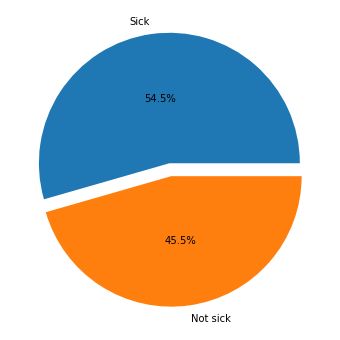

In [6]:
# How many of the 303 people were diagnosed with the disease.
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=data['target'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=['Sick', 'Not sick'], pctdistance=0.5)

In general, before data processing or model prediction, we can check the correlation coefficient of each feature. If the correlation coefficient between two features is extremely high, it means that the content of these two features is highly duplicated and perhaps one of them can be removed during feature selection; if the correlation coefficient between a feature and the predicted target is extremely high, it means that this feature is important and needs to be retained. 

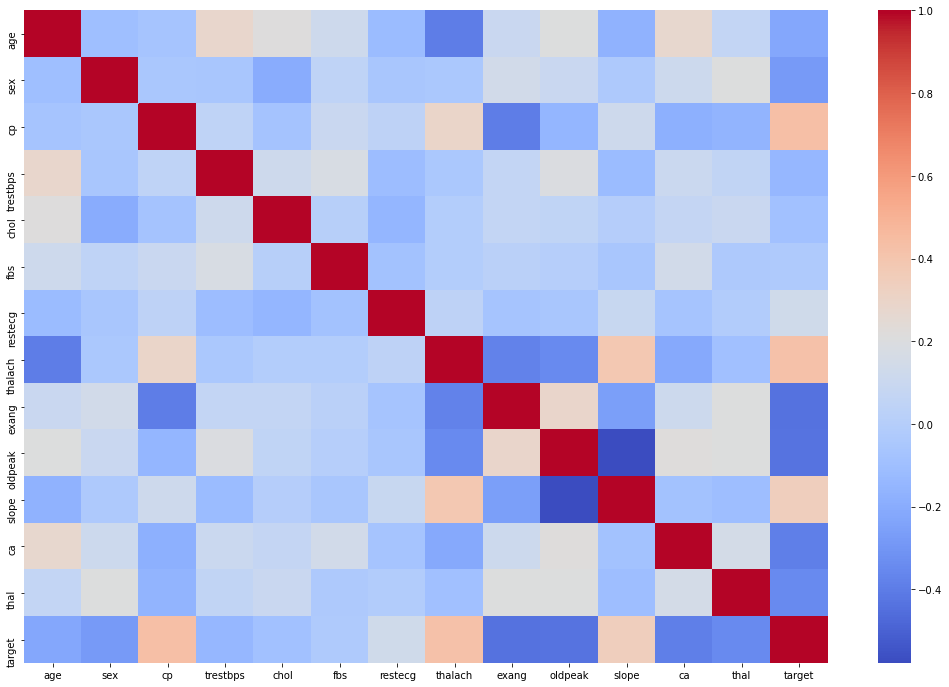

In [7]:
# Feature correlation coefficient graph
# Warmer colours represent higher correlation coefficients, cooler colours represent lower correlation coefficients.
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(data.corr(),ax= ax, cmap='coolwarm');

In [8]:
# the exact value of the correlation coefficient between features
data.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Pre-processing
### One-hot coding

In [9]:
data = pd.get_dummies(data, columns=['slope'])
data = pd.get_dummies(data, columns=['thal'])                          

Print data info to see the changes in the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  ca        303 non-null    int64  
 11  target    303 non-null    int64  
 12  slope_0   303 non-null    uint8  
 13  slope_1   303 non-null    uint8  
 14  slope_2   303 non-null    uint8  
 15  thal_0    303 non-null    uint8  
 16  thal_1    303 non-null    uint8  
 17  thal_2    303 non-null    uint8  
 18  thal_3    303 non-null    uint8  
dtypes: float64(1), int64(11), uint8(7)
memory usage: 30.6 KB


### Split the dataset into data and labels

In [11]:
x_data = data.drop('target', axis=1)
y_data = data.target.values

### Standardisation

In [12]:
scaler = StandardScaler()
scaler.fit(x_data)
print(scaler.mean_)
print(scaler.transform(x_data))

[5.43663366e+01 6.83168317e-01 9.66996700e-01 1.31623762e+02
 2.46264026e+02 1.48514851e-01 5.28052805e-01 1.49646865e+02
 3.26732673e-01 1.03960396e+00 7.29372937e-01 6.93069307e-02
 4.62046205e-01 4.68646865e-01 6.60066007e-03 5.94059406e-02
 5.47854785e-01 3.86138614e-01]
[[ 0.9521966   0.68100522  1.97312292 ...  3.97911213 -1.10076284
  -0.79311554]
 [-1.91531289  0.68100522  1.00257707 ... -0.25131234  0.9084609
  -0.79311554]
 [-1.47415758 -1.46841752  0.03203122 ... -0.25131234  0.9084609
  -0.79311554]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.25131234 -1.10076284
   1.26085034]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.25131234 -1.10076284
   1.26085034]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.25131234  0.9084609
  -0.79311554]]


### Split the dataset into training set (70%) and test set (30%)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size= 0.3, random_state=33)

## Build a Logistic Regression model

In [14]:
model = LogisticRegression()

Train the Logistic Regression model using training data

In [15]:
model.fit(X_train, y_train)

/Users/zhuolin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluate the model using training data

In [16]:
model.score(X_train,y_train)

0.8773584905660378

Evaluate the model using test data

In [17]:
model.score(X_test, y_test)

0.8461538461538461

## Evalution

In [18]:
y_predict = model.predict(X_test)

In [19]:
y_true = y_test
y_pred = y_predict
target_names = ['healthy', 'sick']
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     healthy       0.93      0.78      0.85        50
        sick       0.78      0.93      0.84        41

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.85      0.85        91

